In [1]:
import pandas as pd
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\synthetic_fraud_800k_200k.csv')

In [2]:
import pandas as pd

# Assuming 'is_fraud' is your dependent variable and 'features' are your independent variables
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
# If you have categorical variables, create dummies (one-hot encoding)
X = pd.get_dummies(X)
# Save X and y to separate files
X.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\independent_variables.csv', index=False)
y.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\dependent_variable.csv', index=False)

In [3]:
# Calculate the split index
split_index = int(0.5 * len(df))

# Split the data into train and test
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Save the training and testing sets to separate files
X_train.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\X_train.csv', index=False)
X_test.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\X_test.csv', index=False)
y_train.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\y_train.csv', index=False)
y_test.to_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\y_test.csv', index=False)

In [5]:
import statsmodels.api as sm
import pickle

# Add a constant (intercept) to the independent variables
X_train = sm.add_constant(X_train)
# Build the logistic regression model
model = sm.Logit(y_train, X_train)
res = model.fit()
# Print the summary of the model
print(res.summary())
# Save the model to a file using pickle
with open('C:\\Users\\Divya Shree\\Desktop\\internship\\logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(res, model_file)

Optimization terminated successfully.
         Current function value: 0.115743
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               500000
Model:                          Logit   Df Residuals:                   499994
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.7686
Time:                        20:51:28   Log-Likelihood:                -57872.
converged:                       True   LL-Null:                   -2.5009e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5470      0.032   -173.393      0.000      -5.610      -5.484
Unnamed: 0  1.609e-08   5.23

In [21]:
import statsmodels.api as sm
import pickle

# Load the saved logistic regression model
with open('C:\\Users\\Divya Shree\\Desktop\\internship\\logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Assuming you have a new dataset for prediction (X_test)
# Add a constant (intercept) to the independent variables in the test dataset
X_train = sm.add_constant(X_train)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_train)

# You can print the predicted probabilities or convert them to binary labels
# For example, if you want to convert to binary labels with a threshold of 0.5
binary_predictions = (predictions >= 0.5).astype(int)

# Print the predictions
print("Predicted Probabilities:")
print(predictions)

print("Predicted Binary Labels (threshold=0.5):")
print(binary_predictions)


Predicted Probabilities:
0         7.900586e-04
1         4.493192e-06
2         9.012345e-01
3         6.942931e-01
4         2.882323e-08
              ...     
499995    6.121866e-01
499996    5.289776e-06
499997    1.377011e-04
499998    1.817535e-04
499999    9.392128e-04
Length: 500000, dtype: float64
Predicted Binary Labels (threshold=0.5):
0         0
1         0
2         1
3         1
4         0
         ..
499995    1
499996    0
499997    0
499998    0
499999    0
Length: 500000, dtype: int32


In [22]:
# Predict the probabilities for the training data
y_train_pred = res.predict(X_train)

# Set a threshold (e.g., 0.5) to classify the predictions into 0 or 1
threshold = 0.5
y_train_pred_class = (y_train_pred > threshold).astype(int)

# Compare the predicted classes with the actual classes
correctly_predicted = (y_train == y_train_pred_class)

# Calculate accuracy
accuracy = correctly_predicted.sum() / len(correctly_predicted)

print(f"Accuracy on the training data: {accuracy:.2%}")

Accuracy on the training data: 96.62%


In [23]:
# Predict the probabilities for the training data
y_train_pred = res.predict(X_train)

# Set a threshold (e.g., 0.5) to classify the predictions into 0 or 1
threshold = 0.5
y_train_pred_class = (y_train_pred > threshold).astype(int)

# Calculate the confusion matrix
true_positive = ((y_train == 1) & (y_train_pred_class == 1)).sum()
true_negative = ((y_train == 0) & (y_train_pred_class == 0)).sum()
false_positive = ((y_train == 0) & (y_train_pred_class == 1)).sum()
false_negative = ((y_train == 1) & (y_train_pred_class == 0)).sum()

print(f"True Positives: {true_positive}")
print(f"True Negatives: {true_negative}")
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")

True Positives: 96370
True Negatives: 386753
False Positives: 13329
False Negatives: 3548


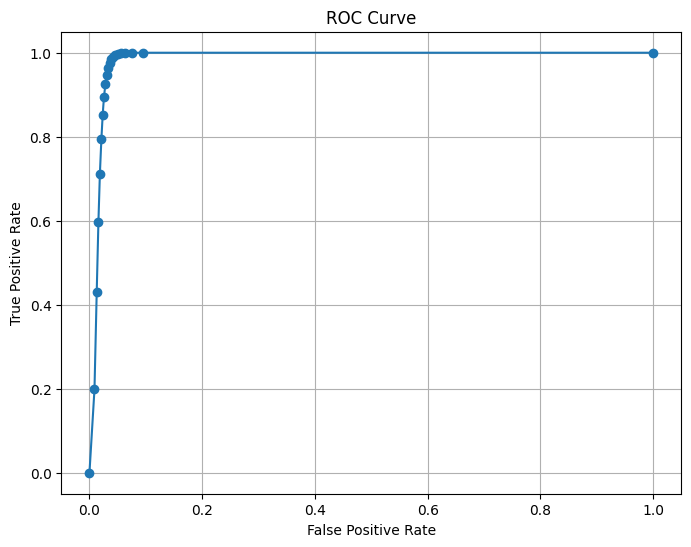

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the probabilities for the training data
y_train_pred = res.predict(X_train)

# Create an array of threshold values
thresholds = np.arange(0, 1.05, 0.05)

# Initialize empty lists for TPR and FPR
tpr_list = []
fpr_list = []

# Calculate TPR and FPR for each threshold
for threshold in thresholds:
    y_train_pred_class = (y_train_pred > threshold).astype(int)
    true_positive = ((y_train == 1) & (y_train_pred_class == 1)).sum()
    true_negative = ((y_train == 0) & (y_train_pred_class == 0)).sum()
    false_positive = ((y_train == 0) & (y_train_pred_class == 1)).sum()
    false_negative = ((y_train == 1) & (y_train_pred_class == 0)).sum()
    
    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [31]:
# Predict the probabilities for the training data
y_train_pred = res.predict(X_train)

# Set a threshold (e.g., 0.5) to classify the predictions into 0 or 1
threshold = 0.5
y_train_pred_class = (y_train_pred > threshold).astype(int)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
true_positive = ((y_train == 1) & (y_train_pred_class == 1)).sum()
true_negative = ((y_train == 0) & (y_train_pred_class == 0)).sum()
false_positive = ((y_train == 0) & (y_train_pred_class == 1)).sum()
false_negative = ((y_train == 1) & (y_train_pred_class == 0)).sum()

# Calculate Sensitivity (True Positive Rate)
sensitivity = true_positive / (true_positive + false_negative)

# Calculate Specificity
specificity = true_negative / (true_negative + false_positive)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2%}")
print(f"Specificity: {specificity:.2%}")


Sensitivity (True Positive Rate): 96.45%
Specificity: 96.67%


In [33]:
import numpy as np

# Predict the probabilities for the training data
y_train_pred = res.predict(X_train)

# Create an array of the actual labels (0 for negative, 1 for positive)
actual_labels = np.array(y_train)

# Sort the predicted probabilities in descending order and get the corresponding actual labels
sorted_indices = np.argsort(y_train_pred)[::-1]
sorted_labels = actual_labels[sorted_indices]

# Calculate the cumulative distribution function (CDF) for both classes
cdf_positive = np.cumsum(sorted_labels) / sum(actual_labels)
cdf_negative = np.cumsum(1 - sorted_labels) / (len(actual_labels) - sum(actual_labels))

# Calculate the KS statistic
ks_statistic = max(np.abs(cdf_positive - cdf_negative))

print(f"KS Statistic: {ks_statistic:.2%}")

KS Statistic: 94.93%
